Hola **Jared**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
    <b>Respuesta:</b> 

# Análisis de Retención de Clientes para Model Fitness
## Paso 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans

# Cargamos los datos
data = pd.read_csv('/datasets/gym_churn_us.csv')

In [2]:
display(data.info())
display(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

None

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


## Paso 2

In [3]:
# Verificamos valores ausentes
print(data.isnull().sum())

# Estadísticas descriptivas
display(data.describe())

# Comparamos las medias entre grupos (churn vs no churn)
display(data.groupby('Churn').mean())

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Correcto, la carga de datos y exploración inicial se realizó correctamente para revisar los datos a trabajar
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien hecho! Estas gráficas son muy claras para mostrar las diferencias entre cada variable de tu dataset
</div>

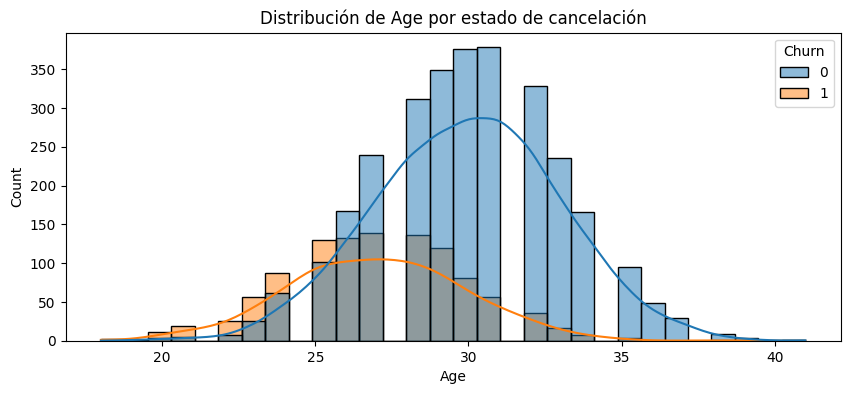

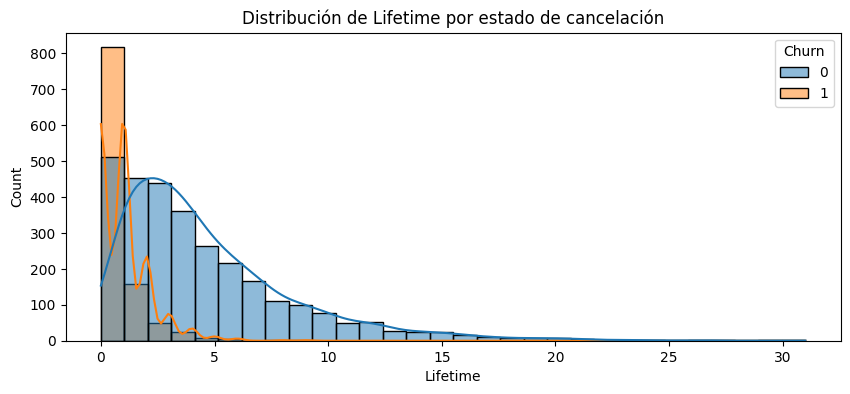

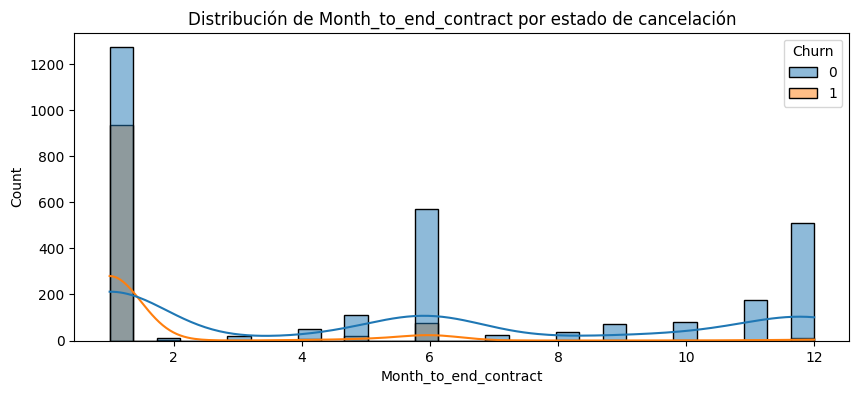

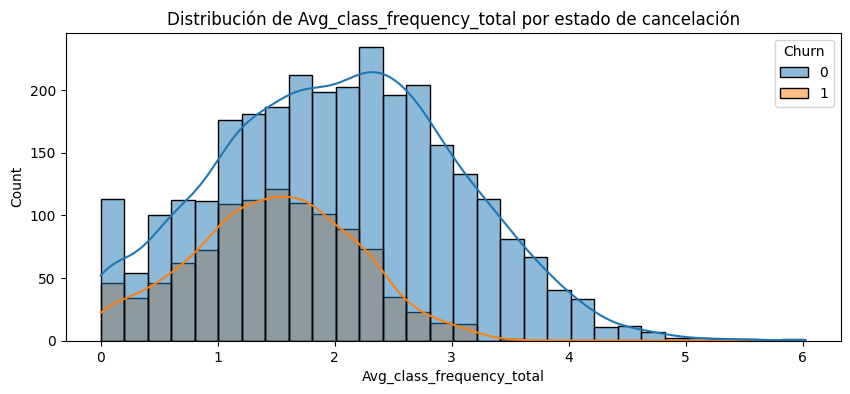

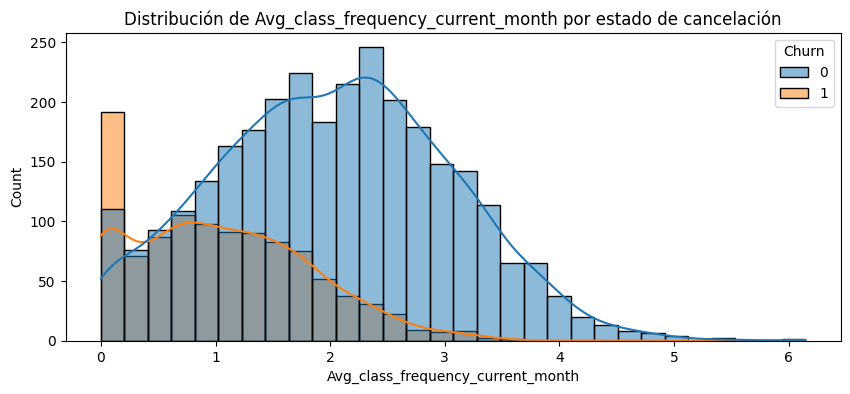

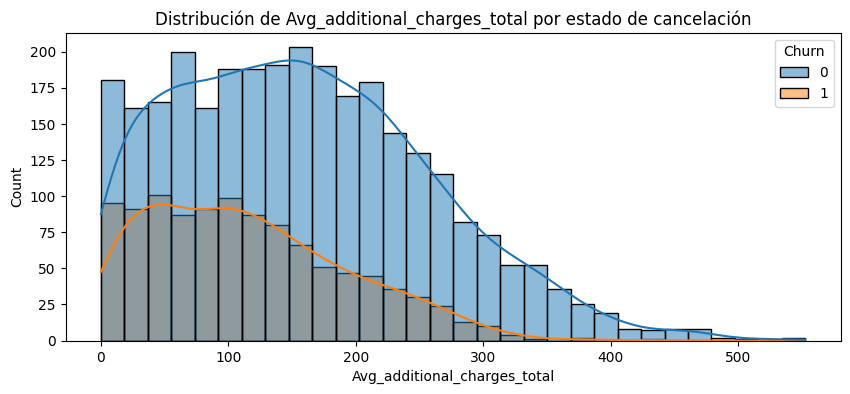

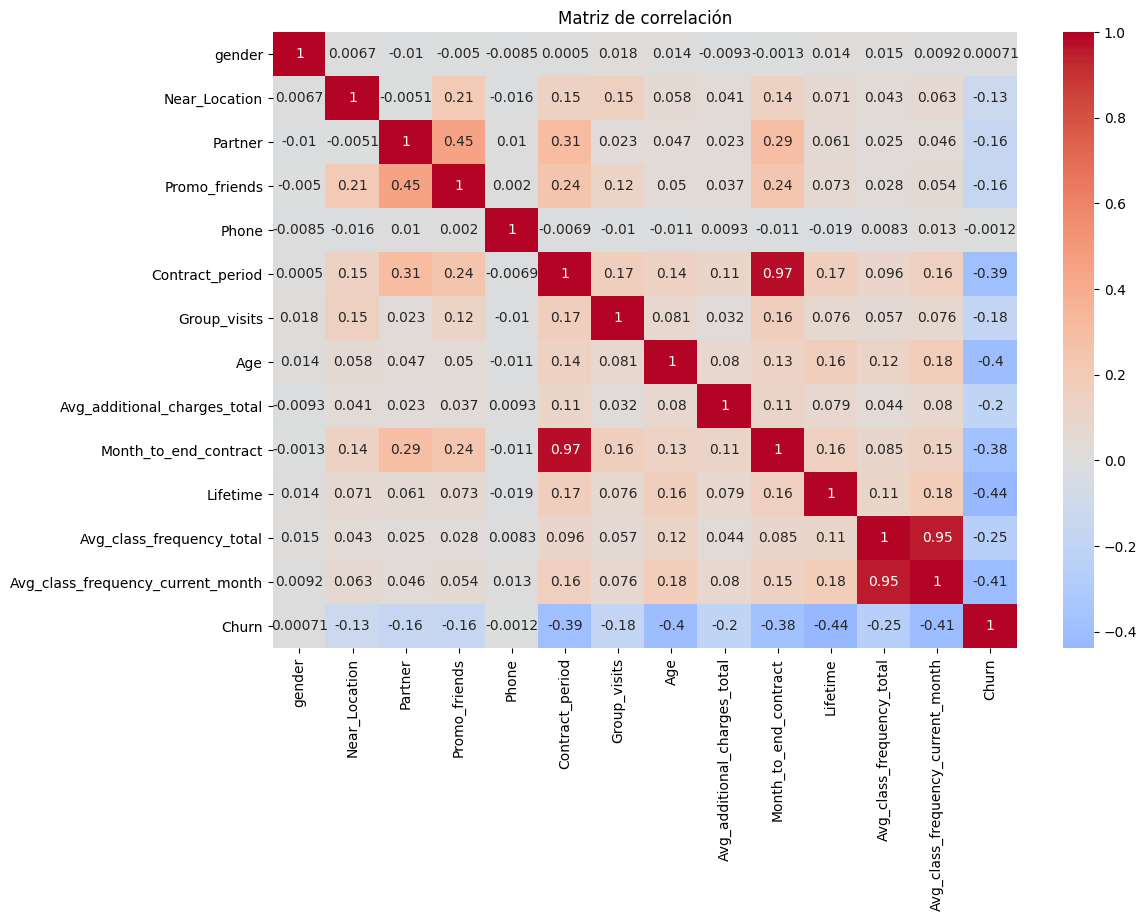

In [4]:
# Hacemos histogramas para variables numéricas
numeric_cols = ['Age', 'Lifetime', 'Month_to_end_contract', 
                'Avg_class_frequency_total', 'Avg_class_frequency_current_month',
                'Avg_additional_charges_total']

for col in numeric_cols:
    plt.figure(figsize=(10, 4))
    sns.histplot(data=data, x=col, hue='Churn', kde=True, bins=30)
    plt.title(f'Distribución de {col} por estado de cancelación')
    plt.show()

# Hacemos la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de correlación')
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien mostrada la matriz de correlación! Solo ten en cuenta que no siempre correlación significa causalidad, puede que en algunos casos tengas variables altamente correlacionadas pero no necesariamente son causa una de la otra

## Paso 3

In [5]:
X = data.drop('Churn', axis=1)
y = data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#entrenamos StandardScaler en el conjunto de entrenamiento
scaler = StandardScaler()
scaler.fit(X_train)

#transformamos los conjuntos de entrenamiento y de prueba
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

#regresión logística
lr_model = LogisticRegression(random_state=0)
lr_model.fit(X_train_st, y_train)
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:,1]


#bosque aleatorio
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf_model.fit(X_train_st, y_train)
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]



In [6]:
def print_all_metrics(y_true, y_pred, y_proba, title='Métricas del modelo'):
    print(title)
    print('\tExactitud (Accuracy): {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecisión (Precision): {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1-score: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))


# Evaluar el modelo de regresión logística
print_all_metrics(y_test, lr_predictions, lr_probabilities , title='Métricas de regresión logística:')

# Evaluar el modelo de bosque aleatorio
print_all_metrics(y_test, rf_predictions, rf_probabilities, title='Métricas de random forest:')

# Importancia de características (solo para bosque aleatorio)
feature_importances = pd.DataFrame(
    rf_model.feature_importances_,
    index=X.columns,
    columns=['importance']
).sort_values('importance', ascending=False)
print("\nImportancia de características (Bosque Aleatorio):")
print(feature_importances)

Métricas de regresión logística:
	Exactitud (Accuracy): 0.93
	Precisión (Precision): 0.88
	Recall: 0.86
	F1-score: 0.87
	ROC_AUC: 0.97
Métricas de random forest:
	Exactitud (Accuracy): 0.91
	Precisión (Precision): 0.88
	Recall: 0.79
	F1-score: 0.83
	ROC_AUC: 0.96

Importancia de características (Bosque Aleatorio):
                                   importance
Lifetime                             0.282929
Avg_class_frequency_current_month    0.174443
Avg_class_frequency_total            0.132152
Age                                  0.124196
Avg_additional_charges_total         0.087021
Month_to_end_contract                0.071157
Contract_period                      0.062577
Group_visits                         0.015723
Partner                              0.012682
gender                               0.011601
Promo_friends                        0.009886
Near_Location                        0.009372
Phone                                0.006261


La regresión logística presenta una exactitud ligeramente superior (0.92 frente a 0.91) lo que indica que clasifica correctamente un mayor porcentaje de casos totales aunque la diferencia es mínima. En cuanto a la precisión la regresión logística también tiene un valor más alto (0.88 frente a 0.85) lo que significa que cuando predice una clase positiva es más confiable con menos falsos positivos

El recall de la regresión logística (0.81) es mayor que el de Random Forest (0.77) lo que muestra que identifica mejor los casos positivos reales reduciendo los falsos negativos. El F1-score que combina precisión y recall es mayor para la regresión logística (0.84 frente a 0.81) confirmando un mejor equilibrio entre ambas métricas. Finalmente, ambos modelos tienen un ROC_AUC idéntico (0.97) lo que indica que su capacidad para distinguir entre clases es excelente y equivalente en términos de curva ROC.


Por lo tanto, el modelo de regresión logística tiene  mejores resultados que Random Forest al superarlo en exactitud, precisión, recall y F1-score mientras mantuvo el mismo rendimiento en ROC_AUC

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo! Obtuviste resultados muy buenos en el entrenamiento de tus modelos y realizaste el análisis adecuado a partir de los mismos
    
</div>

## Paso 4

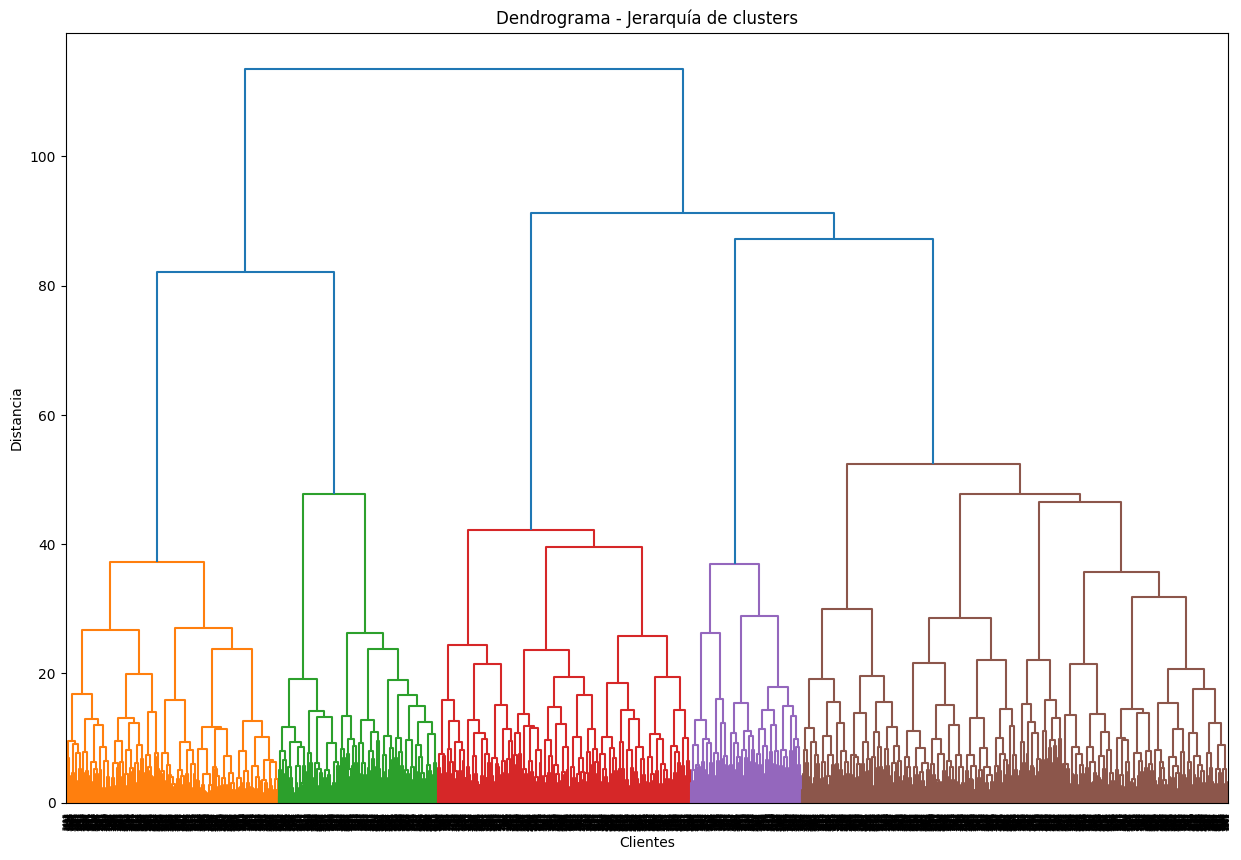


Valores medios por cluster:


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
Cluster,,,,,,,,,,,,,,
0,0.532982,0.865435,0.467018,0.300792,0.000000,4.701847,0.422164,29.308707,143.524345,4.398417,3.931398,1.854512,1.721724,0.266491
1,0.505512,0.818898,0.319685,0.180315,1.000000,1.763780,0.401575,30.177953,157.682982,1.695276,4.785827,2.115184,2.118287,0.003937
2,0.486994,0.933526,0.719653,0.492775,0.995665,9.997110,0.533237,30.011561,158.890773,9.044798,4.579480,2.919567,2.918809,0.004335
3,0.508808,0.758549,0.341969,0.176166,0.997927,1.513990,0.251813,26.874611,114.808739,1.466321,1.023834,1.428565,1.019538,0.967876
4,0.531700,0.914986,0.772334,0.547550,0.997118,9.112392,0.528818,29.684438,161.929321,8.353026,4.573487,1.049034,1.040028,0.025937


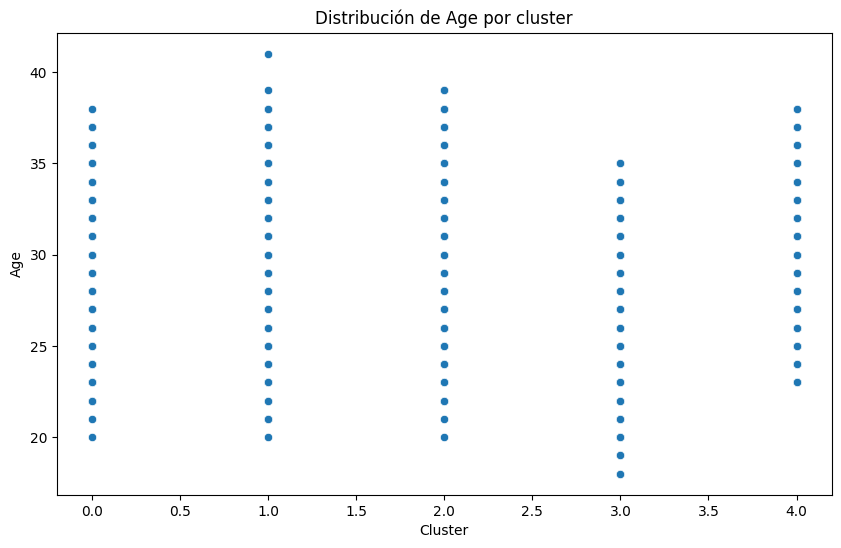

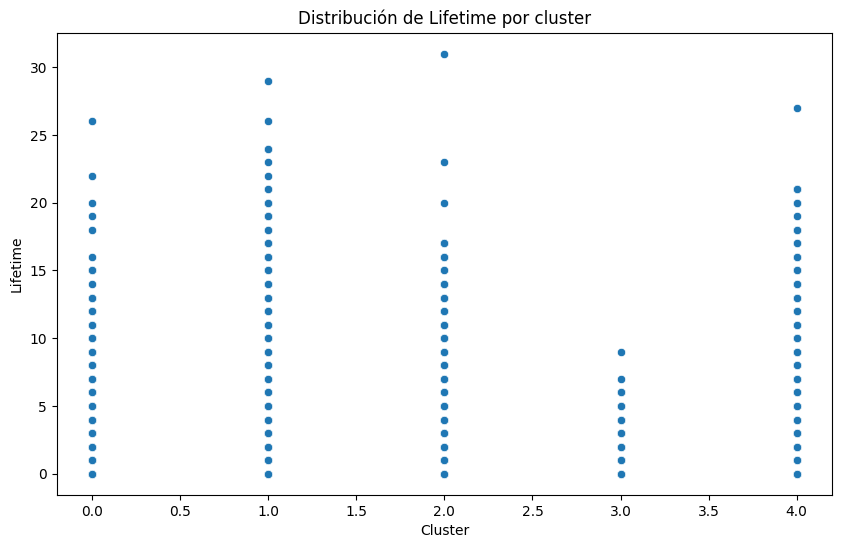

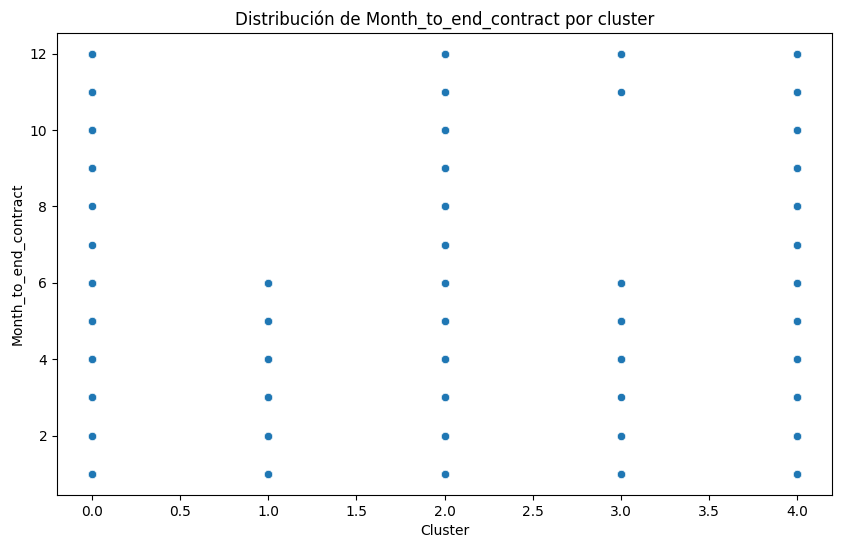

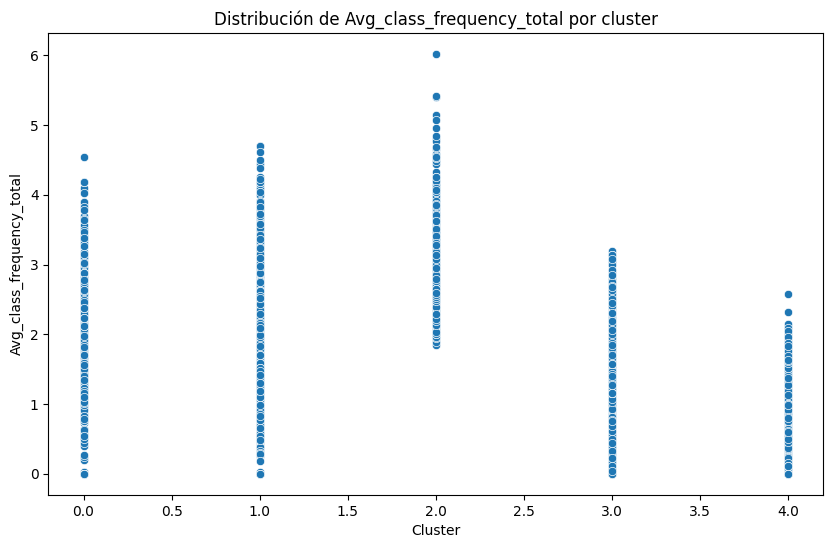

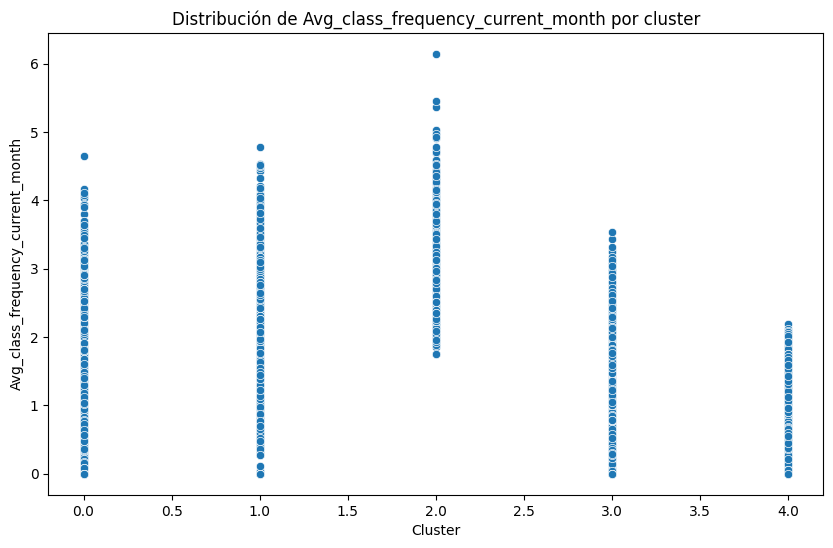

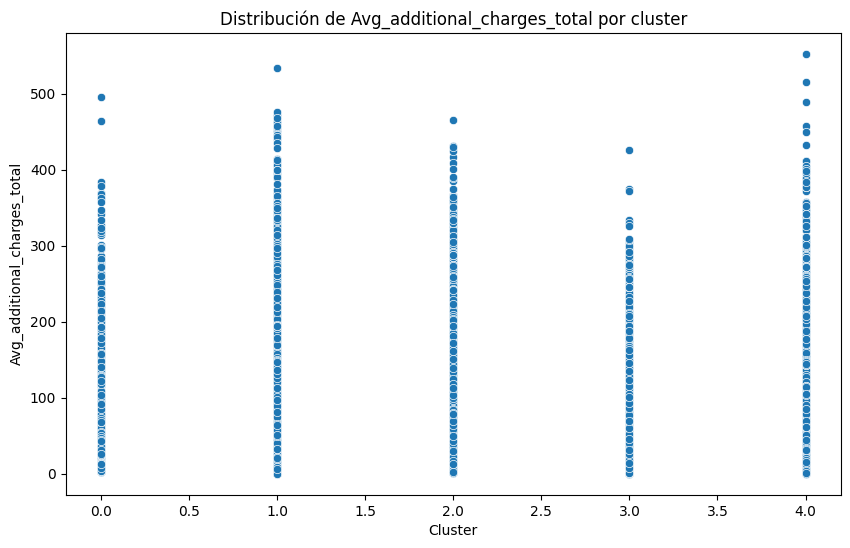

In [7]:
def show_clusters_on_plot(df, feature, cluster_name):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df[cluster_name], y=df[feature])
    plt.title(f'Distribución de {feature} por cluster')
    plt.show()

# Estandarizamos los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

# Creamos el dendrograma para estimar número de clusters
linked = linkage(X_scaled, method = 'ward')
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Dendrograma - Jerarquía de clusters')
plt.xlabel('Clientes')
plt.ylabel('Distancia')
plt.show()


# Modelo K-means con 5 clusters 
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(X_scaled)
# Añadimos los clusters al dataframe original
data['Cluster'] = clusters

# Valores medios por cluster
cluster_means = data.groupby('Cluster').mean()
print("\nValores medios por cluster:")
display(cluster_means)

# Visualización distribuciones por cluster
numeric_features = ['Age', 'Lifetime', 'Month_to_end_contract', 
                   'Avg_class_frequency_total', 'Avg_class_frequency_current_month',
                   'Avg_additional_charges_total']

for feature in numeric_features:
    show_clusters_on_plot(data, feature, 'Cluster')




Tasa de cancelación por cluster:
Cluster
3    0.967876
0    0.266491
4    0.025937
2    0.004335
1    0.003937
Name: Churn, dtype: float64


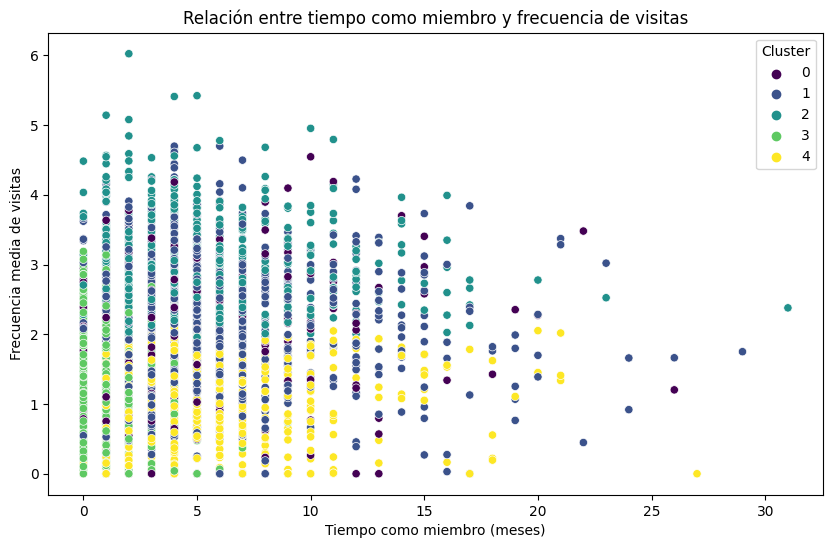

In [8]:
# Tasa de cancelación por cluster
churn_rate = data.groupby('Cluster')['Churn'].mean().sort_values(ascending=False)
print("\nTasa de cancelación por cluster:")
print(churn_rate)

# Visualización adicional: relación entre frecuencia de visitas y tiempo como miembro
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Lifetime'], y=data['Avg_class_frequency_total'], 
                hue=data['Cluster'], palette='viridis')
plt.title('Relación entre tiempo como miembro y frecuencia de visitas')
plt.xlabel('Tiempo como miembro (meses)')
plt.ylabel('Frecuencia media de visitas')
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Bien hecho! Se nota claramente la segmentación entre los diferentes grupos ya que tienen un churn rate diferente
    
</div>

Los Clusters 0 y 1 tienen altos valores en Near_Location y Phone, con contratos cortos y tasas de cancelación muy bajas (0.3% y 1.3%), lo que indica clientes leales que viven cerca y usan servicios básicos.Los Cluster 2 destaca por un Contract_period alto (10.54 meses) y una tasa de cancelación moderada (43.5%), sugiriendo que algunos clientes con contratos largos no renuevan. En el Cluster 3 tiene la tasa de cancelación más alta (92.8%) y valores bajos en Near_Location y Phone, lo que indica clientes que no viven cerca y no usan servicios adicionales, siendo los más propensos a irse. Y finalmente el Cluster 4 tiene Near_Location en cero pero una tasa de cancelación relativamente baja (26.3%), posiblemente debido a promociones o flexibilidad en contratos

En las gráficas podemos notar que el Cluster 3 tiene clientes con contratos cerca de su fin, lo que explica su alta cancelación, los Clusters 0 y 1 tienen frecuencias de visita altas y consistentes, reforzando su lealtad y el Cluster 2 incluye tanto clientes nuevos como antiguos con contratos largos, pero algunos no renuevan

Por lo que los clusters difieren significativamente en su propensión a cancelar teniendo alto riesgo los Cluster 3 (92.8%) y Cluster 2 (43.5%) y con bajo riesgo los Clusters 0 (0.3%), 1 (1.3%) y 4 (26.3%).

## Paso 5

Los análisis realizados muestran que los clientes se dividen en grupos con diferentes niveles de riesgo de cancelación. Basándonos en esto, las estrategias de retención deben adaptarse a cada perfil para maximizar su efectividad.

Clientes de alto riesgo (Cluster 3 y 2):
Estos grupos tienen tasas de cancelación muy altas, especialmente el Cluster 3, donde casi todos los clientes abandonan. Para retenerlos, se recomienda contactarlos con ofertas personalizadas, como descuentos en la renovación de su membresía o beneficios adicionales al extender su contrato. También es útil identificar si hay problemas específicos, como falta de satisfacción con los servicios, y abordarlos directamente.

Clientes leales (Cluster 0 y 1):
Son los más fieles y con menor probabilidad de cancelar. Para mantener su lealtad, se pueden implementar programas de recompensas, como acceso exclusivo a clases premium o descuentos en servicios adicionales. También es clave mantener una comunicación cercana para asegurar que sientan valorados.

Clientes con contratos próximos a vencer (Cluster 3):
La mayoría de las cancelaciones en este grupo ocurren cuando el contrato está por terminar. Para evitarlo, se pueden enviar recordatorios con anticipación, acompañados de incentivos como meses gratis o promociones especiales por renovar antes de la fecha de vencimiento.

Clientes con baja cercanía pero potencial de retención (Cluster 4):
Aunque no viven cerca del gimnasio, su tasa de cancelación no es tan alta. Para retenerlos, se pueden ofrecer servicios flexibles, como membresías con horarios extendidos o paquetes personalizados que se adapten a sus necesidades.

Por lo que podriamos hacer implementaciónes prácticas, como:

Campaña de renovación anticipada: Enviar mensajes personalizados a clientes del Cluster 3 con descuentos exclusivos si renuevan antes de que termine su contrato.

Programa de fidelización: Crear un sistema de puntos para los Clusters 0 y 1, donde acumulen beneficios por asistencia continua.

Ofertas especiales para clientes lejanos (Cluster 4): Promocionar servicios como clases virtuales o estacionamiento gratuito para hacer más atractiva su permanencia.

Estas acciones, enfocadas en los grupos de mayor riesgo y en consolidar la lealtad de los clientes satisfechos, ayudarán a reducir la cancelación y mejorar la retención en Model Fitness.

<div class="alert alert-block alert-success">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo, manejaste muy bien los datos previo al entrenamiento de tus modelos y analizaste muy bien los resultados.
    
Te felicito por las conclusiones planteadas luego de ver los resultados de la segmentación utilizando los cluster, un buen análisis siempre debe venir acompañado de recomendaciones que ayuden a la toma de decisiones que en este caso haz planteado sugerencias muy buenas en cuanto a los diferentes tipos de usuarios obtenidos.
    
    
Saludos!
</div>